## 1. Iniciando Sessão Spark

In [1]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
        .appName("trab-eng-dados") \
        .config("spark.executor.memory", "2g") \
        .getOrCreate()

## 2. Exploração Inicial dos Dados

### 2.1 Carregando os dados

In [3]:
import requests
import zipfile

url = "https://cdn.tse.jus.br/estatistica/sead/eleicoes/eleicoes2022/buweb/bweb_1t_RN_051020221321.zip"
zip_file_path = "/home/jovyan/work/data/bu.zip"
csv_file_path = "/home/jovyan/work/data/bu.csv"

# Download the zip file
response = requests.get(url)
with open(zip_file_path, "wb") as f:
    f.write(response.content)

# Extract the csv file from the zip
with zipfile.ZipFile(zip_file_path, "r") as zip_ref:
    zip_ref.extractall(csv_file_path)

In [42]:
# Load the csv data into a DataFrame
data_raw = spark.read.csv("bweb_1t_RN_051020221321.csv", header=True, inferSchema=True, encoding="latin1", sep=";")

# data_raw = (spark.read
#             .format("csv")
#             .option("header", True)
#             .option("sep", ";")
#             .option("encoding", "latin1")
#             #.schema(schema)
#             #.load("hdfs://master:9000/data/bweb_csv.zip")
#             .load("https://github.com/bombermal/docker-hadoop-cluster/blob/dev/Data/bweb_csv.zip")
#            )

### 2.2 Conhecendo o Dataset

#### 2.2.1 Shape

In [24]:
row_count = data_raw.count()
column_count = len(data_raw.columns)
print(f"Qtd Linhas: {row_count} \nQtd Colunas: {column_count}")

Qtd Linhas: 878328 
Qtd Colunas: 45


#### 2.2.2 Tipo dos dados

In [18]:
data_raw.printSchema()

root
 |-- DT_GERACAO: string (nullable = true)
 |-- HH_GERACAO: timestamp (nullable = true)
 |-- ANO_ELEICAO: integer (nullable = true)
 |-- CD_TIPO_ELEICAO: integer (nullable = true)
 |-- NM_TIPO_ELEICAO: string (nullable = true)
 |-- CD_PLEITO: integer (nullable = true)
 |-- DT_PLEITO: string (nullable = true)
 |-- NR_TURNO: integer (nullable = true)
 |-- CD_ELEICAO: integer (nullable = true)
 |-- DS_ELEICAO: string (nullable = true)
 |-- SG_UF: string (nullable = true)
 |-- CD_MUNICIPIO: integer (nullable = true)
 |-- NM_MUNICIPIO: string (nullable = true)
 |-- NR_ZONA: integer (nullable = true)
 |-- NR_SECAO: integer (nullable = true)
 |-- NR_LOCAL_VOTACAO: integer (nullable = true)
 |-- CD_CARGO_PERGUNTA: integer (nullable = true)
 |-- DS_CARGO_PERGUNTA: string (nullable = true)
 |-- NR_PARTIDO: integer (nullable = true)
 |-- SG_PARTIDO: string (nullable = true)
 |-- NM_PARTIDO: string (nullable = true)
 |-- DT_BU_RECEBIDO: string (nullable = true)
 |-- QT_APTOS: integer (nullable

#### 2.2.3 Registros

In [17]:
data_raw.show(3, truncate=False, vertical=True)

-RECORD 0-------------------------------------------------------
 DT_GERACAO                  | 05/10/2022                       
 HH_GERACAO                  | 2023-06-21 15:19:40              
 ANO_ELEICAO                 | 2022                             
 CD_TIPO_ELEICAO             | 0                                
 NM_TIPO_ELEICAO             | Eleição Ordinária                
 CD_PLEITO                   | 406                              
 DT_PLEITO                   | 02/10/2022                       
 NR_TURNO                    | 1                                
 CD_ELEICAO                  | 544                              
 DS_ELEICAO                  | Eleição Geral Federal 2022       
 SG_UF                       | RN                               
 CD_MUNICIPIO                | 17612                            
 NM_MUNICIPIO                | NATAL                            
 NR_ZONA                     | 1                                
 NR_SECAO                

#### 2.2.4 Describe

In [26]:
data_raw.describe().show(truncate=False, vertical=True)

-RECORD 0-----------------------------------------------------
 summary                     | count                          
 DT_GERACAO                  | 878328                         
 ANO_ELEICAO                 | 878328                         
 CD_TIPO_ELEICAO             | 878328                         
 NM_TIPO_ELEICAO             | 878328                         
 CD_PLEITO                   | 878328                         
 DT_PLEITO                   | 878328                         
 NR_TURNO                    | 878328                         
 CD_ELEICAO                  | 878328                         
 DS_ELEICAO                  | 878328                         
 SG_UF                       | 878328                         
 CD_MUNICIPIO                | 878328                         
 NM_MUNICIPIO                | 878328                         
 NR_ZONA                     | 878328                         
 NR_SECAO                    | 878328                  

#### 2.2.5 Quantidade de valores nulos

In [29]:
from pyspark.sql.functions import col, sum

# Calculate the count of null values in each column
null_counts = [sum(col(column_name).isNull().cast("integer")).alias(column_name) for column_name in data_raw.columns]

# Create a DataFrame with the null value counts
null_counts_df = data_raw.select(null_counts)

# Display the null value counts
null_counts_df.show(vertical=True)

-RECORD 0--------------------------
 DT_GERACAO                  | 0   
 HH_GERACAO                  | 0   
 ANO_ELEICAO                 | 0   
 CD_TIPO_ELEICAO             | 0   
 NM_TIPO_ELEICAO             | 0   
 CD_PLEITO                   | 0   
 DT_PLEITO                   | 0   
 NR_TURNO                    | 0   
 CD_ELEICAO                  | 0   
 DS_ELEICAO                  | 0   
 SG_UF                       | 0   
 CD_MUNICIPIO                | 0   
 NM_MUNICIPIO                | 0   
 NR_ZONA                     | 0   
 NR_SECAO                    | 0   
 NR_LOCAL_VOTACAO            | 0   
 CD_CARGO_PERGUNTA           | 0   
 DS_CARGO_PERGUNTA           | 0   
 NR_PARTIDO                  | 0   
 SG_PARTIDO                  | 0   
 NM_PARTIDO                  | 0   
 DT_BU_RECEBIDO              | 0   
 QT_APTOS                    | 0   
 QT_COMPARECIMENTO           | 0   
 QT_ABSTENCOES               | 0   
 CD_TIPO_URNA                | 0   
 DS_TIPO_URNA               

#### 2.2.6 Quantidade de valores distintos

In [52]:
from pyspark.sql.functions import col, countDistinct

distinct_counts_df = data_raw.agg(*(countDistinct(col(c)).alias(c) for c in data_raw.columns))
distinct_counts_df.show(truncate=False, vertical=True)

-RECORD 0---------------------------
 DT_GERACAO                  | 1    
 HH_GERACAO                  | 1    
 ANO_ELEICAO                 | 1    
 CD_TIPO_ELEICAO             | 1    
 NM_TIPO_ELEICAO             | 1    
 CD_PLEITO                   | 1    
 DT_PLEITO                   | 1    
 NR_TURNO                    | 1    
 CD_ELEICAO                  | 2    
 DS_ELEICAO                  | 2    
 SG_UF                       | 1    
 CD_MUNICIPIO                | 167  
 NM_MUNICIPIO                | 167  
 NR_ZONA                     | 60   
 NR_SECAO                    | 628  
 NR_LOCAL_VOTACAO            | 153  
 CD_CARGO_PERGUNTA           | 5    
 DS_CARGO_PERGUNTA           | 5    
 NR_PARTIDO                  | 30   
 SG_PARTIDO                  | 30   
 NM_PARTIDO                  | 30   
 DT_BU_RECEBIDO              | 4166 
 QT_APTOS                    | 402  
 QT_COMPARECIMENTO           | 346  
 QT_ABSTENCOES               | 151  
 CD_TIPO_URNA                | 1    
 

## 3. Limpeza e Transformação dos dados

### 3.1 Deletando amostras com valores nulos

In [54]:
# Drop rows with null values
data_cleaned = data_raw.na.drop()

# Calculate the count of null values in each column
null_counts = [sum(col(column_name).isNull().cast("integer")).alias(column_name) for column_name in data_cleaned.columns]

# Create a DataFrame with the null value counts
null_counts_df = data_cleaned.select(null_counts)

# Display the null value counts
null_counts_df.show(vertical=True)

-RECORD 0--------------------------
 DT_GERACAO                  | 0   
 HH_GERACAO                  | 0   
 ANO_ELEICAO                 | 0   
 CD_TIPO_ELEICAO             | 0   
 NM_TIPO_ELEICAO             | 0   
 CD_PLEITO                   | 0   
 DT_PLEITO                   | 0   
 NR_TURNO                    | 0   
 CD_ELEICAO                  | 0   
 DS_ELEICAO                  | 0   
 SG_UF                       | 0   
 CD_MUNICIPIO                | 0   
 NM_MUNICIPIO                | 0   
 NR_ZONA                     | 0   
 NR_SECAO                    | 0   
 NR_LOCAL_VOTACAO            | 0   
 CD_CARGO_PERGUNTA           | 0   
 DS_CARGO_PERGUNTA           | 0   
 NR_PARTIDO                  | 0   
 SG_PARTIDO                  | 0   
 NM_PARTIDO                  | 0   
 DT_BU_RECEBIDO              | 0   
 QT_APTOS                    | 0   
 QT_COMPARECIMENTO           | 0   
 QT_ABSTENCOES               | 0   
 CD_TIPO_URNA                | 0   
 DS_TIPO_URNA               

## 4. Análise Exploratória

### 4.1 Taxa de comparecimento às eleições

#### 4.1.1 - Por Seção Eleitoral

In [106]:
from pyspark.sql.functions import sum, col, round, max
taxa_comp_secao = (data_cleaned
                 .groupBy("NM_MUNICIPIO", "NR_ZONA", "NR_SECAO")
                 .agg(
                     max("QT_APTOS").alias("QT_APTOS"),
                     max("QT_COMPARECIMENTO").alias("QT_COMPARECIMENTO"),
                     max("QT_ABSTENCOES").alias("QT_ABSTENCOES")
                    )
                 .withColumn("TAXA_COMPARECIMENTO", round((col("QT_COMPARECIMENTO") / col("QT_APTOS") * 100), 2))
                 .orderBy("NR_ZONA", "NR_SECAO")
                )
taxa_comp_secao.show(truncate=False)

+------------+-------+--------+--------+-----------------+-------------+-------------------+
|NM_MUNICIPIO|NR_ZONA|NR_SECAO|QT_APTOS|QT_COMPARECIMENTO|QT_ABSTENCOES|TAXA_COMPARECIMENTO|
+------------+-------+--------+--------+-----------------+-------------+-------------------+
|NATAL       |1      |1       |329     |252              |77           |76.6               |
|NATAL       |1      |2       |337     |288              |49           |85.46              |
|NATAL       |1      |3       |331     |267              |64           |80.66              |
|NATAL       |1      |4       |328     |270              |58           |82.32              |
|NATAL       |1      |5       |447     |370              |77           |82.77              |
|NATAL       |1      |6       |445     |349              |96           |78.43              |
|NATAL       |1      |7       |447     |359              |88           |80.31              |
|NATAL       |1      |8       |378     |312              |66          

#### 4.1.2 - Por Zona Eleitoral

In [210]:
taxa_comp_zona = (taxa_comp_secao
                     .groupBy("NR_ZONA")
                     .agg(
                         sum("QT_APTOS").alias("QT_APTOS"),
                         sum("QT_COMPARECIMENTO").alias("QT_COMPARECIMENTO"),
                         sum("QT_ABSTENCOES").alias("QT_ABSTENCOES")
                        )
                     .withColumn("TAXA_COMPARECIMENTO", round((col("QT_COMPARECIMENTO") / col("QT_APTOS") * 100), 2))
                     .withColumn("TAXA_ABSTENCOES", round((col("QT_ABSTENCOES") / col("QT_APTOS") * 100), 2))
                     .orderBy("NR_ZONA")
                    )
taxa_comp_zona.show(truncate=False)

+-------+--------+-----------------+-------------+-------------------+---------------+
|NR_ZONA|QT_APTOS|QT_COMPARECIMENTO|QT_ABSTENCOES|TAXA_COMPARECIMENTO|TAXA_ABSTENCOES|
+-------+--------+-----------------+-------------+-------------------+---------------+
|1      |107907  |86922            |20985        |80.55              |19.45          |
|2      |120566  |97525            |23041        |80.89              |19.11          |
|3      |129896  |104067           |25829        |80.12              |19.88          |
|4      |105718  |83675            |22043        |79.15              |20.85          |
|5      |66481   |54991            |11490        |82.72              |17.28          |
|6      |56373   |46553            |9820         |82.58              |17.42          |
|7      |43034   |34730            |8304         |80.7               |19.3           |
|8      |30508   |25557            |4951         |83.77              |16.23          |
|9      |45302   |37055            |8247   

#### 4.1.1 - Por Município

In [203]:
taxa_comp_mun = (taxa_comp_secao
                 .groupBy("NM_MUNICIPIO")
                 .agg(
                     sum("QT_APTOS").alias("QT_APTOS"),
                     sum("QT_COMPARECIMENTO").alias("QT_COMPARECIMENTO"),
                     sum("QT_ABSTENCOES").alias("QT_ABSTENCOES")
                    )
                 .withColumn("TAXA_COMPARECIMENTO", round((col("QT_COMPARECIMENTO") / col("QT_APTOS") * 100), 2))
                 .withColumn("TAXA_ABSTENCOES", round((col("QT_ABSTENCOES") / col("QT_APTOS") * 100), 2))
                 .orderBy("NM_MUNICIPIO")
                )
taxa_comp_mun.show(truncate=False)

+-----------------+--------+-----------------+-------------+-------------------+---------------+
|NM_MUNICIPIO     |QT_APTOS|QT_COMPARECIMENTO|QT_ABSTENCOES|TAXA_COMPARECIMENTO|TAXA_ABSTENCOES|
+-----------------+--------+-----------------+-------------+-------------------+---------------+
|ACARI            |9204    |7415             |1789         |80.56              |19.44          |
|AFONSO BEZERRA   |9841    |7983             |1858         |81.12              |18.88          |
|ALEXANDRIA       |11255   |9120             |2135         |81.03              |18.97          |
|ALMINO AFONSO    |5125    |4313             |812          |84.16              |15.84          |
|ALTO DO RODRIGUES|11345   |9182             |2163         |80.93              |19.07          |
|ANGICOS          |9839    |8177             |1662         |83.11              |16.89          |
|ANTÔNIO MARTINS  |5653    |4856             |797          |85.9               |14.1           |
|APODI            |28897   |24

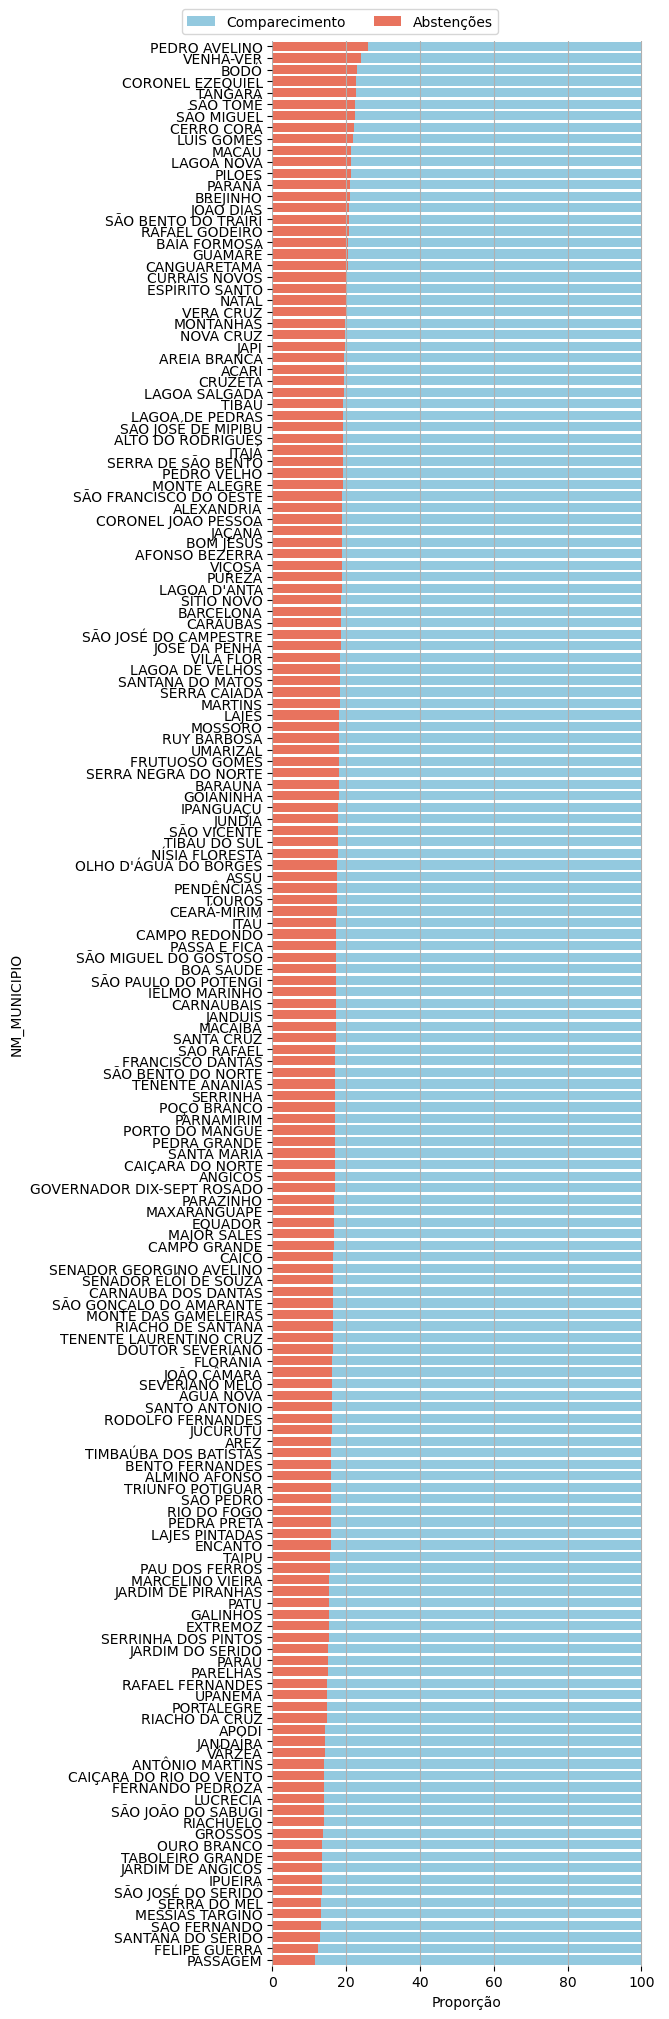

In [209]:
# Temporary ordered df
temp_df = taxa_comp_mun.orderBy(col("TAXA_ABSTENCOES").desc()).toPandas()
# Fig
fig, ax = plt.subplots(figsize=(5, 25))
# Plot
temp_df['TAXA_COMPARECIMENTO'] = 100
sns.barplot(data=temp_df, x="TAXA_COMPARECIMENTO", y="NM_MUNICIPIO", color="skyblue", label="Comparecimento", ax=ax)
sns.barplot(data=temp_df, x="TAXA_ABSTENCOES", y="NM_MUNICIPIO", color="tomato", label="Abstenções", ax=ax)
# Add a legend and informative axis label
ax.legend(ncol=2, bbox_to_anchor=(0.6, 1.02))
ax.set(xlabel="Proporção")
ax.grid(visible=True, axis="x")
sns.despine(left=True, bottom=True)
plt.show()

### 4.2 Municípios com maior e menor taxa de comparecimento

In [113]:
max_row = taxa_comp_mun.orderBy(col("TAXA_COMPARECIMENTO").desc()).head()
min_row = taxa_comp_mun.orderBy(col("TAXA_COMPARECIMENTO")).head()
min_max = spark.createDataFrame([max_row, min_row])
min_max.show()

+-------------+--------+-----------------+-------------+-------------------+
| NM_MUNICIPIO|QT_APTOS|QT_COMPARECIMENTO|QT_ABSTENCOES|TAXA_COMPARECIMENTO|
+-------------+--------+-----------------+-------------+-------------------+
|     PASSAGEM|    3484|             3078|          406|              88.35|
|PEDRO AVELINO|    6605|             4891|         1714|              74.05|
+-------------+--------+-----------------+-------------+-------------------+



### 4.3 Quantidade de votos recebidos por partido

In [122]:
votos_partido = (data_cleaned
                 .groupBy("NR_PARTIDO", "SG_PARTIDO", "NM_PARTIDO")
                 .agg(
                     sum("QT_VOTOS").alias("QT_VOTOS")
                    )
                 .filter(col("SG_PARTIDO")!="#NULO#")
                 .orderBy(col("QT_VOTOS").desc())
                )
votos_partido.show(truncate=False)

+----------+-------------+---------------------------------------+--------+
|NR_PARTIDO|SG_PARTIDO   |NM_PARTIDO                             |QT_VOTOS|
+----------+-------------+---------------------------------------+--------+
|13        |PT           |Partido dos Trabalhadores              |2847985 |
|22        |PL           |Partido Liberal                        |1944493 |
|77        |SOLIDARIEDADE|Solidariedade                          |741764  |
|12        |PDT          |Partido Democrático Trabalhista        |686469  |
|45        |PSDB         |Partido da Social Democracia Brasileira|639038  |
|40        |PSB          |Partido Socialista Brasileiro          |518647  |
|44        |UNIÃO        |UNIÃO BRASIL                           |497233  |
|19        |PODE         |Podemos                                |331365  |
|15        |MDB          |Movimento Democrático Brasileiro       |306267  |
|43        |PV           |Partido Verde                          |164525  |
|11        |

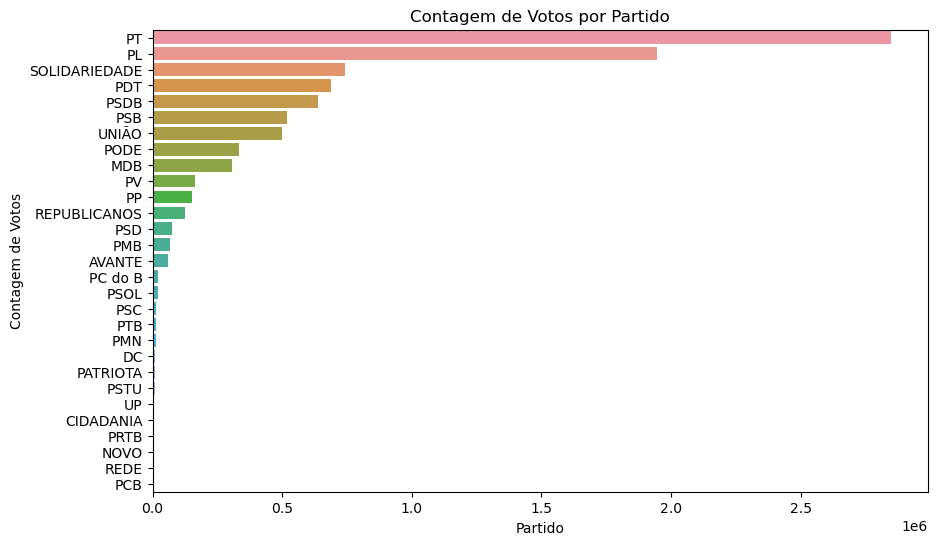

In [221]:
data = votos_partido.toPandas()

# Configurações do gráfico
plt.figure(figsize=(10, 6))
sns.barplot(y='SG_PARTIDO', data=data, x='QT_VOTOS')

# Configurações dos eixos e título
plt.xlabel('Partido')
plt.ylabel('Contagem de Votos')
plt.title('Contagem de Votos por Partido')

# Exibir o gráfico
plt.show()

### 4.4 - Desempenho dos partidos por município

In [135]:
votos_partido_mun = (data_cleaned
                 .groupBy("NM_MUNICIPIO", "SG_PARTIDO", "NM_PARTIDO")
                 .agg(
                     sum("QT_VOTOS").alias("QT_VOTOS")
                    )
                 .filter(col("SG_PARTIDO")!="#NULO#")
                 .orderBy(col("NM_MUNICIPIO"), col("QT_VOTOS").desc())
                )

# Total de votos por município
total_votes_mun = votos_partido_mun.groupBy("NM_MUNICIPIO").agg(sum("QT_VOTOS").alias("TOTAL_VOTOS"))

# Juntando informação de total de votos ao dataframe
votos_partido_mun = votos_partido_mun.join(total_votes_mun, "NM_MUNICIPIO")

# Calculando percentual
votos_partido_mun = (votos_partido_mun
                        .withColumn("PERCENTUAL_VOTOS", round(col("QT_VOTOS") / col("TOTAL_VOTOS") * 100, 2))
                        .orderBy(col("PERCENTUAL_VOTOS").desc())
                    )
votos_partido_mun.show(35, truncate=False)

+--------------------------+----------+-------------------------+--------+-----------+----------------+
|NM_MUNICIPIO              |SG_PARTIDO|NM_PARTIDO               |QT_VOTOS|TOTAL_VOTOS|PERCENTUAL_VOTOS|
+--------------------------+----------+-------------------------+--------+-----------+----------------+
|JANDUÍS                   |PT        |Partido dos Trabalhadores|8052    |16380      |49.16           |
|JOSÉ DA PENHA             |PT        |Partido dos Trabalhadores|7886    |18548      |42.52           |
|SÃO MIGUEL                |PT        |Partido dos Trabalhadores|22175   |56280      |39.4            |
|ALEXANDRIA                |PT        |Partido dos Trabalhadores|16287   |41384      |39.36           |
|MARTINS                   |PT        |Partido dos Trabalhadores|9740    |24755      |39.35           |
|MONTANHAS                 |PT        |Partido dos Trabalhadores|12603   |32318      |39.0            |
|PILÕES                    |PT        |Partido dos Trabalhadores

### 4.5 - Candidatos mais votados por cargo

In [148]:
import pyspark.sql.functions as F
from pyspark.sql.window import Window
votos_cand = (data_cleaned
                 .filter(col("CD_TIPO_VOTAVEL")==1)
                 .groupBy("DS_CARGO_PERGUNTA", "NM_VOTAVEL")
                 .agg(
                     sum("QT_VOTOS").alias("QT_VOTOS")
                    )
                 .orderBy(col("DS_CARGO_PERGUNTA").desc(), col("QT_VOTOS").desc())
                )

# Create a window specification partitioned by 'DS_CARGO_PERGUNTA' and ordered by 'QT_VOTOS' in descending order
window_spec = Window.partitionBy("DS_CARGO_PERGUNTA").orderBy(col("QT_VOTOS").desc())

# Filter the DataFrame to select only the rows with row number = 1 within each 'DS_CARGO_PERGUNTA' group
votos_cand = (votos_cand
                    .withColumn("row_number", F.row_number().over(window_spec)) \
                    .filter(col("row_number") == 1) \
                    .drop("row_number")
                    .orderBy(col("QT_VOTOS").desc())
             )

votos_cand.show(truncate=False)

+-----------------+-----------------+--------+
|DS_CARGO_PERGUNTA|NM_VOTAVEL       |QT_VOTOS|
+-----------------+-----------------+--------+
|Presidente       |LULA             |1264134 |
|Governador       |FATIMA BEZERRA   |1066461 |
|Senador          |ROGÉRIO MARINHO  |708340  |
|Deputado Federal |NATÁLIA BONAVIDES|157554  |
|Deputado Estadual|WENDEL LAGARTIXA |88264   |
+-----------------+-----------------+--------+



### 4.6 - Regiões com maior concentração de votos em determinados partidos ou candidatos

In [159]:
from pyspark.sql.functions import count, desc

votos_partido_mun = (data_cleaned
                 .groupBy("NM_MUNICIPIO", "SG_PARTIDO", "NM_PARTIDO", "DS_CARGO_PERGUNTA", "NM_VOTAVEL")
                 .agg(
                     sum("QT_VOTOS").alias("QT_VOTOS")
                    )
                 .filter(col("SG_PARTIDO")!="#NULO#")
                 .orderBy(col("NM_MUNICIPIO"), col("QT_VOTOS").desc())
                )

# Split the string and create a list of tuples
reg_string = """Agreste Potiguar | Agreste Potiguar | Bom Jesus; Brejinho; Ielmo Marinho; Januário Cicco; Jundiá; Lagoa d'Anta; Lagoa de Pedras; Lagoa Salgada; Monte Alegre; Nova Cruz; Passa e Fica; Passagem; Presidente Juscelino; Riachuelo; Santa Maria; Santo Antônio; São Paulo do Potengi; São Pedro; Senador Elói de Souza; Serrinha; Várzea; Vera Cruz; Boa Saúde; Serra Caiada
Agreste Potiguar | Baixa Verde | Bento Fernandes; Jandaíra; João Câmara; Parazinho; Poço Branco
Agreste Potiguar | Borborema Potiguar | Barcelona; Campo Redondo; Coronel Ezequiel; Jaçanã; Japi; Lagoa de Velhos; Lajes Pintadas; Monte das Gameleiras; Ruy Barbosa; Santa Cruz; São Bento do Trairí; São José do Campestre; São Tomé; Serra de São Bento; Sítio Novo; Tangará
Central Potiguar | Angicos | Afonso Bezerra; Angicos; Caiçara do Rio do Vento; Fernando Pedroza; Jardim de Angicos; Lajes; Pedra Preta; Pedro Avelino
Central Potiguar | Macau | Caiçara do Norte; Galinhos; Guamaré; Macau; São Bento do Norte
Central Potiguar | Seridó Ocidental Potiguar | Caicó; Ipueira; Jardim de Piranhas; São Fernando; São João do Sabugi; Serra Negra do Norte; Timbaúba dos Batistas
Central Potiguar | Seridó Oriental Potiguar | Acari; Carnaúba dos Dantas; Cruzeta; Currais Novos; Equador; Jardim do Seridó; Ouro Branco; Parelhas; Santana do Seridó; São José do Seridó
Central Potiguar | Serra de Santana | Bodó; Cerro Corá; Florânia; Lagoa Nova; Santana do Matos; São Vicente; Tenente Laurentino Cruz
Leste Potiguar | Litoral Nordeste Potiguar | Maxaranguape; Pedra Grande; Pureza; Rio do Fogo; São Miguel de Touros; Taipu; Touros; Arez; São miguel do gostoso
Leste Potiguar | Litoral Sul Potiguar | Arês; Baía Formosa; Canguaretama; Espírito Santo; Goianinha; Montanhas; Pedro Velho; Senador Georgino Avelino; Tibau do Sul; Vila Flor
Leste Potiguar | Macaíba | Ceará-Mirim; Macaíba; Nísia Floresta; São Gonçalo do Amarante; São José de Mipibu
Leste Potiguar | Natal | Extremoz; Natal; Parnamirim
Oeste Potiguar | Chapada do Apodi | Apodi; Caraúbas; Felipe Guerra; Governador Dix-Sept Rosado
Oeste Potiguar | Médio Oeste Potiguar | Augusto Severo; Janduís; Messias Targino; Paraú; Triunfo Potiguar; Upanema; Campo Grande
Oeste Potiguar | Mossoró | Areia Branca; Baraúna; Grossos; Mossoró; Serra do Mel; Tibau
Oeste Potiguar | Pau dos Ferros | Alexandria; Francisco Dantas; Itaú; José da Penha; Marcelino Vieira; Paraná; Pau dos Ferros; Pilões; Portalegre; Rafael Fernandes; Riacho da Cruz; Rodolfo Fernandes; São Francisco do Oeste; Severiano Melo; Taboleiro Grande; Tenente Ananias; Viçosa
Oeste Potiguar | Serra de São Miguel | Água Nova; Coronel João Pessoa; Doutor Severiano; Encanto; Luís Gomes; Major Sales; Riacho de Santana; São Miguel; Venha-Ver
Oeste Potiguar | Umarizal | Almino Afonso; Antônio Martins; Frutuoso Gomes; João Dias; Lucrécia; Martins; Olho d'Água do Borges; Patu; Rafael Godeiro; Serrinha dos Pintos; Umarizal
Oeste Potiguar | Vale do Açu | Assú; Alto do Rodrigues; Carnaubais; Ipanguaçu; Itajá; Jucurutu; Pendências; Porto do Mangue; São Rafael"""

reg_list = [item.split("|") for item in reg_string.split("\n")]

# Create an empty DataFrame with a defined schema
df_regions = spark.createDataFrame([], schema="MACRO: string, MICRO: string, municipio: string")

# Append rows to the DataFrame
for item in reg_list:
    macro = item[0].strip().upper()
    micro = item[1].strip().upper()
    cities = item[2].split(";")
    
    for city in cities:
        df_regions = df_regions.union(
            spark.createDataFrame([(macro, micro, city.strip().upper())], schema="MACRO: string, MICRO: string, municipio: string")
        )
# Merge df_regions with data_df
data_reg_df = votos_partido_mun.join(df_regions, votos_partido_mun["NM_MUNICIPIO"] == df_regions["municipio"], "left")
data_reg_df = data_reg_df.select(votos_partido_mun.columns + df_regions.columns[:2])
data_reg_df.show(truncate=False)


+------------+-------------+---------------------------------------+-----------------+--------------------+--------+--------------+-----+
|NM_MUNICIPIO|SG_PARTIDO   |NM_PARTIDO                             |DS_CARGO_PERGUNTA|NM_VOTAVEL          |QT_VOTOS|MACRO         |MICRO|
+------------+-------------+---------------------------------------+-----------------+--------------------+--------+--------------+-----+
|NATAL       |SOLIDARIEDADE|Solidariedade                          |Deputado Federal |KELPS               |21372   |LESTE POTIGUAR|NATAL|
|NATAL       |PSDB         |Partido da Social Democracia Brasileira|Deputado Estadual|DRA. KARINA PEREIRA |211     |LESTE POTIGUAR|NATAL|
|NATAL       |SOLIDARIEDADE|Solidariedade                          |Deputado Estadual|FLAVIO DO PASTEL    |54      |LESTE POTIGUAR|NATAL|
|NATAL       |MDB          |Movimento Democrático Brasileiro       |Deputado Estadual|MARCELLO            |61      |LESTE POTIGUAR|NATAL|
|NATAL       |UNIÃO        |UNIÃO 

#### 4.6.1 Macro

In [161]:
macro = (data_reg_df
            .groupBy("DS_CARGO_PERGUNTA", "NM_VOTAVEL", "MACRO")
             .agg(
                 sum("QT_VOTOS").alias("QT_VOTOS")
             )
             .orderBy(col("QT_VOTOS").desc())
        )
macro.show(truncate=False)

+-----------------+-----------------+----------------+--------+
|DS_CARGO_PERGUNTA|NM_VOTAVEL       |MACRO           |QT_VOTOS|
+-----------------+-----------------+----------------+--------+
|Presidente       |LULA             |LESTE POTIGUAR  |501979  |
|Governador       |FATIMA BEZERRA   |LESTE POTIGUAR  |437139  |
|Presidente       |LULA             |OESTE POTIGUAR  |389388  |
|Presidente       |JAIR BOLSONARO   |LESTE POTIGUAR  |351873  |
|Senador          |ROGÉRIO MARINHO  |LESTE POTIGUAR  |341735  |
|Governador       |FATIMA BEZERRA   |OESTE POTIGUAR  |329623  |
|Senador          |CARLOS EDUARDO   |LESTE POTIGUAR  |292559  |
|Governador       |FABIO DANTAS     |LESTE POTIGUAR  |206320  |
|Presidente       |LULA             |AGRESTE POTIGUAR|198829  |
|Senador          |ROGÉRIO MARINHO  |OESTE POTIGUAR  |181232  |
|Governador       |CAPITÃO STYVENSON|LESTE POTIGUAR  |175536  |
|Presidente       |LULA             |CENTRAL POTIGUAR|173938  |
|Governador       |FATIMA BEZERRA   |AGR

#### 4.6.1 Micro

In [162]:
micro = (data_reg_df
            .groupBy("DS_CARGO_PERGUNTA", "NM_VOTAVEL", "MICRO")
             .agg(
                 sum("QT_VOTOS").alias("QT_VOTOS")
             )
             .orderBy(col("QT_VOTOS").desc())
        )
micro.show(truncate=False)

+-----------------+-----------------+------------------+--------+
|DS_CARGO_PERGUNTA|NM_VOTAVEL       |MICRO             |QT_VOTOS|
+-----------------+-----------------+------------------+--------+
|Presidente       |LULA             |NATAL             |286366  |
|Governador       |FATIMA BEZERRA   |NATAL             |258670  |
|Presidente       |JAIR BOLSONARO   |NATAL             |251304  |
|Senador          |ROGÉRIO MARINHO  |NATAL             |216597  |
|Senador          |CARLOS EDUARDO   |NATAL             |202793  |
|Governador       |FABIO DANTAS     |NATAL             |131167  |
|Governador       |CAPITÃO STYVENSON|NATAL             |130848  |
|Presidente       |LULA             |MOSSORÓ           |124104  |
|Presidente       |LULA             |MACAÍBA           |116872  |
|Governador       |FATIMA BEZERRA   |MOSSORÓ           |108865  |
|Presidente       |LULA             |AGRESTE POTIGUAR  |106424  |
|Governador       |FATIMA BEZERRA   |MACAÍBA           |100249  |
|Governado

### 4.7 - Proporção de votos válidos, brancos e nulos

In [167]:
votos_tipo = (data_cleaned
                 .groupBy("DS_CARGO_PERGUNTA", "DS_TIPO_VOTAVEL")
                 .agg(
                     sum("QT_VOTOS").alias("QT_VOTOS"),
                    )
                 #.withColumn("TAXA_COMPARECIMENTO", round((col("QT_COMPARECIMENTO") / col("QT_APTOS") * 100), 2))
                 .orderBy("DS_CARGO_PERGUNTA", "DS_TIPO_VOTAVEL")
                )
votos_tipo.show(truncate=False)

+-----------------+---------------+--------+
|DS_CARGO_PERGUNTA|DS_TIPO_VOTAVEL|QT_VOTOS|
+-----------------+---------------+--------+
|Deputado Estadual|Branco         |101210  |
|Deputado Estadual|Legenda        |107350  |
|Deputado Estadual|Nominal        |1775756 |
|Deputado Estadual|Nulo           |102351  |
|Deputado Federal |Branco         |110778  |
|Deputado Federal |Legenda        |77322   |
|Deputado Federal |Nominal        |1792973 |
|Deputado Federal |Nulo           |105594  |
|Governador       |Branco         |95721   |
|Governador       |Nominal        |1828927 |
|Governador       |Nulo           |162019  |
|Presidente       |Branco         |26151   |
|Presidente       |Nominal        |2007210 |
|Presidente       |Nulo           |57188   |
|Senador          |Branco         |154483  |
|Senador          |Nominal        |1692463 |
|Senador          |Nulo           |239721  |
+-----------------+---------------+--------+



In [170]:
# Total de votos por cargo
votos_nulos = votos_tipo.groupBy("DS_CARGO_PERGUNTA").agg(sum("QT_VOTOS").alias("TOTAL_VOTOS"))

# Juntando informação de total de votos ao dataframe
votos_nulos = votos_tipo.join(votos_nulos, "DS_CARGO_PERGUNTA")

# Calculando percentual
votos_nulos = (votos_nulos
                        .withColumn("PERCENTUAL_VOTOS", round(col("QT_VOTOS") / col("TOTAL_VOTOS") * 100, 2))
                        .orderBy(col("DS_CARGO_PERGUNTA"), col("PERCENTUAL_VOTOS").desc())
                    )
votos_nulos.show(truncate=False)

+-----------------+---------------+--------+-----------+----------------+
|DS_CARGO_PERGUNTA|DS_TIPO_VOTAVEL|QT_VOTOS|TOTAL_VOTOS|PERCENTUAL_VOTOS|
+-----------------+---------------+--------+-----------+----------------+
|Deputado Estadual|Nominal        |1775756 |2086667    |85.1            |
|Deputado Estadual|Legenda        |107350  |2086667    |5.14            |
|Deputado Estadual|Nulo           |102351  |2086667    |4.9             |
|Deputado Estadual|Branco         |101210  |2086667    |4.85            |
|Deputado Federal |Nominal        |1792973 |2086667    |85.93           |
|Deputado Federal |Branco         |110778  |2086667    |5.31            |
|Deputado Federal |Nulo           |105594  |2086667    |5.06            |
|Deputado Federal |Legenda        |77322   |2086667    |3.71            |
|Governador       |Nominal        |1828927 |2086667    |87.65           |
|Governador       |Nulo           |162019  |2086667    |7.76            |
|Governador       |Branco         |957